CNN 

In [20]:
import keras
from keras.datasets import mnist
from matplotlib import pyplot as plt
import tensorflow as tf
import cv2
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import array_to_img, img_to_array
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Flatten

charger la base de données MNIST

In [31]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

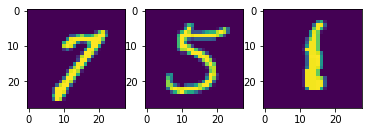

In [32]:
randindices=np.random.randint(x_train.shape[0],size=3)
plt.figure()
plt.subplot(1,3,1)
plt.imshow(x_train[randindices[0],:,:])
plt.subplot(1,3,2)
plt.imshow(x_train[randindices[1],:,:])
plt.subplot(1,3,3)
plt.imshow(x_train[randindices[2],:,:])

# Preprocess Data

In [14]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


convertir les classes en vecteurs binaires (categorical)

In [16]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [18]:
# Reshape the dataset into 4D array
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

# Define a CNN model (Convolutional Neural Network)

In [21]:
model = keras.Sequential()
model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', padding='valid', input_shape=(28,28,1)))
model.add(MaxPooling2D())
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu', padding='valid'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=84, activation='relu'))
model.add(Dense(units=10, activation = 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [22]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
batch_size = 128
epochs = 20

In [25]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Epoch 1/20
469/469 [==============================] - 23s 46ms/step - loss: 0.3200 - accuracy: 0.9054 - val_loss: 0.0830 - val_accuracy: 0.9737
Epoch 2/20
469/469 [==============================] - 21s 45ms/step - loss: 0.0860 - accuracy: 0.9739 - val_loss: 0.0578 - val_accuracy: 0.9812
Epoch 3/20
469/469 [==============================] - 21s 46ms/step - loss: 0.0630 - accuracy: 0.9809 - val_loss: 0.0543 - val_accuracy: 0.9831
Epoch 4/20
469/469 [==============================] - 21s 45ms/step - loss: 0.0505 - accuracy: 0.9839 - val_loss: 0.0486 - val_accuracy: 0.9841
Epoch 5/20
469/469 [==============================] - 21s 45ms/step - loss: 0.0415 - accuracy: 0.9871 - val_loss: 0.0324 - val_accuracy: 0.9888
Epoch 6/20
469/469 [==============================] - 21s 45ms/step - loss: 0.0368 - accuracy: 0.9886 - val_loss: 0.0418 - val_accuracy: 0.9853
Epoch 7/20
469/469 [==============================] - 21s 45ms/step - loss: 0.0306 - accuracy: 0.9900 - val_loss: 0.0327 - val_accuracy:

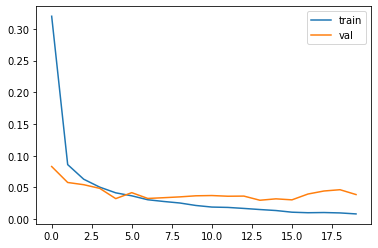

In [28]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()

score sur toute la base de données de test

In [27]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03878765553236008
Test accuracy: 0.9907000064849854
